# Marker genes description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 12,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

## KEGG

Load KEGG annotations

In [3]:
meta = {}
with open('./input_data/ko_name.txt', 'r') as f:
    for line in f:
        og = line.strip().split('\t')[0]
        description = line.strip().split('\t')[1]
        meta[og] = description

In [4]:
pathway_name = {}
with open('./input_data/pathway_name.txt', 'r') as f:
    for line in f:
        og = line.strip().split('\t')[0]
        description = line.strip().split('\t')[1]
        pathway_name[og] = description

In [5]:
pathways = {}
with open('./input_data/ko-to-pathway.map', 'r') as f:
    for line in f:
        key = line.strip().split('\t')[0]
        # Take only the first element
        val = line.strip().split('\t')[1:]
        pathways[key] = val

In [6]:
rclass = {}
with open('./input_data/pathway-to-class.map', 'r') as f:
    for line in f:
        key = line.strip().split('\t')[0]
        val = line.strip().split('\t')[1]
        rclass[key] = val

In [7]:
def annotate_genes(ogs, meta, pathways, pathway_name, rclass):

    data = {'OGs': [], 'Description': [], 'Pathways': [], 'rClasses': []}

    for og in ogs:
        if og in meta.keys():
            data['OGs'].append(og)
            data['Description'].append(meta[og])
            if og in pathways.keys():
                categories = [pathway_name[ptw] for ptw in pathways[og] if ptw in pathway_name.keys()]
                # rclasses = [rclass[ptw] else "Not Assigned" for ptw in pathways[og] if ptw in rclass.keys() and rclass[ptw] not in ['Organismal Systems', 'Human Diseases']]
                rclasses = []
                for ptw in pathways[og]:
                    if ptw in rclass.keys():
                        if rclass[ptw] not in ['Organismal Systems', 'Human Diseases']:
                            rclasses.append(rclass[ptw])
                        else:
                            rclasses.append('NA')
                data['Pathways'].append(categories)
                data['rClasses'].append(rclasses)
            else:
                print(f'{og} not in pathway')
                data['Pathways'].append('NA')
                data['rClasses'].append('NA')
        else:
            print(f'{og} not in meta')
            continue
                
    # Create data frame
    df = pd.DataFrame.from_dict(data)
    df.set_index(['OGs'], inplace = True)
    # df.sort_index(inplace = True)
    
    return df

In [8]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
dfs = []
for k in ks:
    genes = np.loadtxt(f'./output_data/emp/marker_genes/kegg/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    dfs.append(annotate_genes(genes, meta, pathways, pathway_name, rclass))

K02356 not in pathway
K03438 not in pathway
K01990 not in pathway
K03088 not in pathway
K02003 not in pathway
K02004 not in pathway
K01462 not in pathway
K01990 not in pathway
K02834 not in pathway
K02838 not in pathway
K07052 not in pathway
K02003 not in pathway
K02004 not in pathway
K03424 not in pathway
K02600 not in pathway
K01462 not in pathway
K03977 not in pathway
K03438 not in pathway
K06925 not in pathway
K03466 not in pathway
K03496 not in pathway
K03497 not in pathway
K07566 not in pathway
K13292 not in pathway
K04078 not in pathway
K02356 not in pathway
K02357 not in pathway
K02519 not in pathway
K03088 not in pathway
K03545 not in pathway
K03687 not in pathway
K03569 not in pathway
K07042 not in pathway
K07052 not in pathway
K07056 not in pathway
K02600 not in pathway
K13292 not in pathway
K03664 not in pathway
K01056 not in pathway
K03687 not in pathway
K03699 not in pathway
K01990 not in pathway
K02834 not in pathway
K02835 not in pathway
K02838 not in pathway
K02003 not

Count the number of genes in category

In [9]:
def count_categories(annotation, categories, criteria):
    counts = {}
    for category in categories:
        counts[category] = []
        for criterion in criteria:
            i = 0
            for row in criterion[annotation]:
                if category in row:
                    i += 1
            counts[category].append(i)
                
    return counts

In [10]:
categories = ['Genetic Information Processing', 'Metabolism', 'Environmental Information Processing',
             'Cellular Processes', 'NA']
col_names = ks

In [11]:
counts = count_categories('rClasses', categories, dfs)
df_rclass_high = pd.DataFrame.from_dict(counts, orient = 'index', columns = col_names)
# Normalize counts
df_rclass_high = (df_rclass_high / df_rclass_high.sum(axis = 0)) * 100
# Sort by relative abundance
df_rclass_high = df_rclass_high.loc[df_rclass_high.sum(axis = 1).sort_values(ascending = False).index]

In [12]:
df_rclass_high

,10,50,100,200,400,600,800,1000
NA,70.0,46.031746,41.025641,36.796537,34.437086,34.214391,36.151279,37.433155
Metabolism,20.0,14.285714,16.239316,19.047619,27.373068,33.186490,35.706340,36.274510
Genetic Information Processing,10.0,20.634921,30.769231,33.333333,28.256071,21.292217,17.130145,14.973262
Cellular Processes,0.0,12.698413,7.692308,6.493506,5.960265,5.726872,5.450501,4.991087
Environmental Information Processing,0.0,6.349206,4.273504,4.329004,3.973510,5.580029,5.561735,6.327986


Reorder rows

In [13]:
df_rclass_high = df_rclass_high.loc[['Genetic Information Processing', 'NA',
                                     'Metabolism', 'Environmental Information Processing', 'Cellular Processes']]

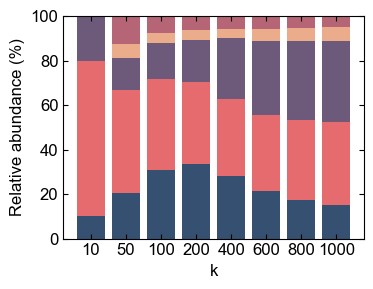

In [14]:
plt.figure(figsize = (3.9, 3.05))
colors = {'Genetic Information Processing': '#355070', 'Metabolism': '#6d597a',
          'Cellular Processes': '#b56576', 'Environmental Information Processing': '#eaac8b',
         'NA': '#e56b6f'}
bottom = np.zeros(df_rclass_high.shape[1])
i = 0
for category, datum in df_rclass_high.iterrows():
    plt.bar([0, 1, 2, 3, 4, 5, 6, 7], datum.values, bottom = bottom, label = category, color = colors[category])
    bottom += datum
    i += 1
# plt.legend(bbox_to_anchor = (0, 1, 1, 0),
#            loc = 'upper left',
#           mode = 'expand', ncol = 2)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ks, rotation = 0)
plt.xlabel('k')
plt.ylabel(f'Relative abundance (%)')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.savefig(f'./figures/figure_S5C.svg')
plt.show()

## Mobile Genetic Elements (MGEs) in marker gene sets

To count how many MBEs are contained the set of selected marker, we will use a text description query of the following terms (validate by [Vatanen 2022](https://www.sciencedirect.com/science/article/pii/S0092867422014672#fig3)):

### KEGG

In [15]:
import re

In [16]:
mbes_description = ['antitermination', 'baseplate', 'capsid', 'excisionase', 'DUF4102', 'pf00665', 'KilA-N', 'ORF11CD3', 'phage',
                  'portal', 'tail', 'terminase', 'tape', 'T5orf172', 'viral', 'virion', 'conjugal', 'conjugation', 'conjugative',
                  'DotD', 'IV secretory', 'IV secretion', 'MobA', 'mobilisation', 'mobilization', 'MobL', 'DUF955', 'plasmid',
                  'relaxase', 'TcpE', 'TraG', 'TraL', 'TraM', 'DDE', 'pf01609', 'IS66', 'IstB', 'transposase', 'transposon', 'transposition',
                  'anti-restriction', 'antirestriction', 'integrase', 'integration']

In [17]:
mbes_kos = ['K02238', 'K02242', 'K02243', 'K02244', 'K02245', 'K02246', 'K12296', 'K04096', 'K06198', 'K07343']

In [18]:
len(mbes_kos)

10

Identify the KOs associated with MBEs description

In [19]:
tmp = []
for ko, description in meta.items():
    for mbe_desc in mbes_description:
        if re.search(mbe_desc.lower(), description.lower()):
            print(f'{ko}: {description}; {mbe_desc}')
            tmp.append(ko)

K01000: mraY; phospho-N-acetylmuramoyl-pentapeptide-transferase [EC:2.7.8.13]; tape
K01152: isftu1; isftu1 transposase; transposase
K01551: arsA, ASNA1, GET3; arsenite/tail-anchored protein-transporting ATPase [EC:7.3.2.7 7.3.-.-]; tail
K02334: dpo; DNA polymerase bacteriophage-type [EC:2.7.7.7]; phage
K02563: murG; UDP-N-acetylglucosamine--N-acetylmuramyl-(pentapeptide) pyrophosphoryl-undecaprenol N-acetylglucosamine transferase [EC:2.4.1.227]; tape
K02600: nusA; transcription termination/antitermination protein NusA; antitermination
K02601: nusG; transcription termination/antitermination protein NusG; antitermination
K03194: virB1; type IV secretion system protein VirB1; IV secretion
K03195: virB10, lvhB10; type IV secretion system protein VirB10; IV secretion
K03196: virB11, lvhB11; type IV secretion system protein VirB11 [EC:7.4.2.8]; IV secretion
K03197: virB2, lvhB2; type IV secretion system protein VirB2; IV secretion
K03198: virB3, lvhB3; type IV secretion system protein VirB3;

In [20]:
len(tmp)

135

Remove KOs from `tmp` that are not relevant

In [21]:
to_remove = ['K01000', 'K01551', 'K02563', 'K02600', 'K02601', 'K03625', 'K03752', 'K03969', 'K03970', 'K03971', 'K03972', 'K03973', 'K04764', 'K05311',
             'K05788', 'K08691', 'K08777', 'K09011', 'K11954', 'K11955', 'K11956', 'K11957', 'K11958', 'K12349', 'K13818',
             'K14252', 'K14253', 'K18292', 'K18313', 'K18314', 'K19065']

In [22]:
len(to_remove)

31

In [23]:
for ko in to_remove:
    tmp.remove(ko)

In [24]:
len(tmp)

104

In [25]:
mbes_kos.extend(tmp)

In [26]:
len(mbes_kos)

114

Check if MBEs are present in selected marker genes

In [27]:
proportion_mbes = {}
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
for k in ks:
    print(f'At k = {k}')
    genes = np.loadtxt(f'./output_data/emp/marker_genes/kegg/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    mbes = set(genes).intersection(set(mbes_kos)) 
    proportion_mbes[k] = len(mbes) / k
    for mbe in mbes:
        print(f'\t{mbe}: {meta[mbe]}')

At k = 10
At k = 50
At k = 100
	K04096: smf; DNA processing protein
At k = 200
	K04096: smf; DNA processing protein
	K02238: comEC; competence protein ComEC
At k = 400
	K04096: smf; DNA processing protein
	K02238: comEC; competence protein ComEC
	K02242: comFC; competence protein ComFC
At k = 600
	K04096: smf; DNA processing protein
	K02238: comEC; competence protein ComEC
	K04763: xerD; integrase/recombinase XerD
	K02242: comFC; competence protein ComFC
At k = 800
	K04096: smf; DNA processing protein
	K07491: rayT; REP-associated tyrosine transposase
	K02238: comEC; competence protein ComEC
	K04763: xerD; integrase/recombinase XerD
	K07497: K07497; putative transposase
	K02242: comFC; competence protein ComFC
At k = 1000
	K04096: smf; DNA processing protein
	K07491: rayT; REP-associated tyrosine transposase
	K02238: comEC; competence protein ComEC
	K04763: xerD; integrase/recombinase XerD
	K07497: K07497; putative transposase
	K07486: K07486; transposase
	K02242: comFC; competence pro

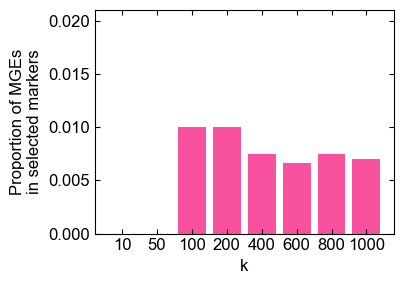

In [28]:
plt.figure(figsize = (4.2, 3))
x = np.arange(len(ks))
plt.bar(x, proportion_mbes.values(), color = '#f72585', label = 'KEGG', alpha = 0.8)
plt.xticks(x, ks)
plt.xlabel(f'k')
plt.ylabel('Proportion of MGEs\nin selected markers')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
# plt.legend()
plt.ylim(0.0, 0.021)
plt.savefig(f'./figures/figure_S5D_kegg.svg')
plt.show()

### EggNog

In [29]:
mbes_description = ['antitermination', 'baseplate', 'capsid', 'excisionase', 'DUF4102', 'pf00665', 'KilA-N', 'ORF11CD3', 'phage',
                  'portal', 'tail', 'terminase', 'tape', 'T5orf172', 'viral', 'virion', 'conjugal', 'conjugation', 'conjugative',
                  'DotD', 'IV secretory', 'IV secretion', 'MobA', 'mobilisation', 'mobilization', 'MobL', 'DUF955', 'plasmid',
                  'relaxase', 'TcpE', 'TraG', 'TraL', 'TraM', 'DDE', 'pf01609', 'IS66', 'IstB', 'transposase', 'transposon', 'transposition',
                  'anti-restriction', 'antirestriction', 'integrase', 'integration']

In [30]:
mbes_gos = []

Identify the GOs associated with MBEs description

In [31]:
meta_eggnog = {}
with open('./input_data/og_description.txt', 'r') as f:
    for line in f:
        og = line.strip().split('\t')[0]
        description = line.strip().split('\t')[1]
        meta_eggnog[og] = description

In [32]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
for k in ks:
    print(f'At k = {k}')
    genes = np.loadtxt(f'./output_data/emp/marker_genes/eggnog/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    for go in genes:
        for mbe_desc in mbes_description: 
            if re.search(mbe_desc.lower(), meta_eggnog[go].lower()):
                print(f'\t{go}: {meta_eggnog[go]}; {mbe_desc}')    

At k = 10
At k = 50
	COG4974: Belongs to the 'phage' integrase family; phage
	COG4974: Belongs to the 'phage' integrase family; integrase
At k = 100
	COG0707: Cell wall formation. Catalyzes the transfer of a GlcNAc subunit on undecaprenyl-pyrophosphoryl-MurNAc-pentapeptide (lipid intermediate I) to form undecaprenyl-pyrophosphoryl-MurNAc- (pentapeptide)GlcNAc (lipid intermediate II); tape
	COG4974: Belongs to the 'phage' integrase family; phage
	COG4974: Belongs to the 'phage' integrase family; integrase
At k = 200
	COG0582: viral genome integration into host DNA; viral
	COG0582: viral genome integration into host DNA; integration
	COG0707: Cell wall formation. Catalyzes the transfer of a GlcNAc subunit on undecaprenyl-pyrophosphoryl-MurNAc-pentapeptide (lipid intermediate I) to form undecaprenyl-pyrophosphoryl-MurNAc- (pentapeptide)GlcNAc (lipid intermediate II); tape
	COG0195: Participates in both transcription termination and antitermination; antitermination
	COG0250: Participates i

Manually check whether the hits actually correcpond to MBEs

In [33]:
tmp = ['COG4974', 'COG0582', 'COG2801', 'COG1943']

In [34]:
mbes_ogs = set(tmp)

In [35]:
len(mbes_ogs)

4

Add also KO mentioned in [Vatanen 2022](https://www.sciencedirect.com/science/article/pii/S0092867422014672#fig3). Take COGs associated to each entry according to KEGG

In [36]:
mbes_ogs.update(['COG0658', 'COG2333', 'COG1040', 'COG2804', 'COG1459', 'COG4537', 'COG2165', 
             'COG0758', 'COG4469', 'COG3070'])

In [37]:
len(mbes_ogs)

14

In [38]:
proportion_mbes_eggnog = {}
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
for k in ks:
    print(f'At k = {k}')
    genes = np.loadtxt(f'./output_data/emp/marker_genes/eggnog/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    mbes = set(genes).intersection(mbes_ogs) 
    proportion_mbes_eggnog[k] = len(mbes) / k
    for mbe in mbes:
        print(f'\t{mbe}: {meta_eggnog[mbe]}')

At k = 10
At k = 50
	COG4974: Belongs to the 'phage' integrase family
At k = 100
	COG4974: Belongs to the 'phage' integrase family
At k = 200
	COG0582: viral genome integration into host DNA
	COG4974: Belongs to the 'phage' integrase family
At k = 400
	COG0582: viral genome integration into host DNA
	COG4974: Belongs to the 'phage' integrase family
	COG0758: DNA mediated transformation
	COG0658: competence protein
	COG1040: competence protein
At k = 600
	COG0582: viral genome integration into host DNA
	COG4974: Belongs to the 'phage' integrase family
	COG0758: DNA mediated transformation
	COG0658: competence protein
	COG1040: competence protein
At k = 800
	COG0582: viral genome integration into host DNA
	COG4974: Belongs to the 'phage' integrase family
	COG0758: DNA mediated transformation
	COG0658: competence protein
	COG2801: Transposase and inactivated derivatives
	COG1040: competence protein
At k = 1000
	COG0582: viral genome integration into host DNA
	COG4974: Belongs to the 'phag

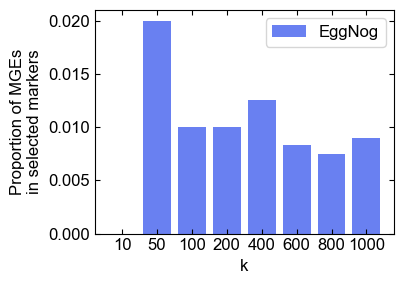

In [39]:
plt.figure(figsize = (4.2, 3))
x = np.arange(len(ks))
plt.bar(x, proportion_mbes_eggnog.values(), color = '#4361ee', label = 'EggNog', alpha = 0.8)
plt.xticks(x, ks)
plt.xlabel(f'k')
plt.ylabel('Proportion of MGEs\nin selected markers')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.legend()
plt.ylim(0.0, 0.021)
plt.savefig(f'./figures/figure_S5D_eggnog.svg')
plt.show()